# Imports

In [1]:
import os
import warnings 

#
import numpy               as np
import pandas              as pd
import seaborn             as sns


from catboost                import CatBoostRegressor
from IPython.core.display    import HTML
from sklearn.model_selection import train_test_split
from matplotlib          import pyplot               as plt

#model_selection divide o df em treino e test


warnings.filterwarnings( 'ignore' ) 
DEBUG = True
#https://www.kaggle.com/c/qualityeducation

### Not using now

In [ ]:

#import math
#import pickle
#import random
#import datetime
 
#import inflection
#



#import xgboost             as xgb
#import matplotlib.gridspec as gridspec
#
#from scipy                 import stats as ss
#from boruta                import BorutaPy
#from tabulate              import tabulate

#
#from IPython.display       import Image

#
#from sklearn.metrics       import mean_absolute_error, mean_squared_error
#from sklearn.ensemble      import RandomForestRegressor
#from sklearn.linear_model  import LinearRegression, Lasso
#from sklearn.preprocessing import LabelEncoder

#https://www.kaggle.com/c/qualityeducation

### 0.1. Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    #%pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [35, 15]
    plt.rcParams['font.size'] = 30
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
jupyter_settings()

### Not using now

In [2]:
## Função Cross Validation
#def cross_validation( x_training, kfold, model_name, model, verbose=False):
#    
#    mae_list = []
#    mape_list = []
#    rmse_list = []
#
#
#    for k in reversed( range( 1, kfold+1 ) ):
#        if verbose:
#            print(f'\nKFold number: {k}') 
#        # Start and End date for validation
#        validation_start_date = x_training['date'].max() - datetime.timedelta( days=k*6*7 )
#        validation_end_date = x_training['date'].max() - datetime.timedelta( days=(k-1)*6*7 ) # coletando o ultimo periodo
#
#        # Filtering dataset
#        training = x_training[x_training['date'] < validation_start_date ] 
#        validation = x_training[(x_training['date'] >= validation_start_date) & (x_training['date'] <= validation_end_date) ] 
#        
#        # training
#        xtraining = training.drop( ['date', 'sales'], axis=1 ) 
#        ytraining = training['sales']
#
#        # validation
#        xvalidation = validation.drop( ['date', 'sales'], axis=1 )
#        yvalidation = validation['sales']
#
#        # model
#        #lr = LinearRegression().fit( xtraining, ytraining) 
#        m = model.fit( xtraining, ytraining )
#        
#        # prediction
#        yhat = m.predict( xvalidation )
#        
#        # performance 
#        m_result = ml_error(model_name, np.exp(yvalidation), np.exp(yhat)) # numpy alterou exm1 para exp
#
#        # store performance of each kfold iteration
#        mae_list.append(m_result['MAE'])
#        mape_list.append(m_result['MAPE'])
#        rmse_list.append(m_result['RMSE'])
#
#    # Actual metric of model performance
#    return pd.DataFrame( {'Model Name': model_name,  
#                          'MAE CV': np.round(np.mean( mae_list),2 ).astype(str) + ' +/- ' + np.round(np.std( mae_list ),2 ).astype(str),
#                          'MAPE CV': np.round(np.mean( mape_list),2 ).astype(str) + ' +/- ' + np.round(np.std( mape_list ),2 ).astype(str),
#                          'RMSE CV': np.round(np.mean( rmse_list),2 ).astype(str) + ' +/- ' + np.round(np.std( rmse_list ),2 ).astype(str)}, index=[0])
#                        
#
## Machine Learn Modelling
#def mean_percentage_error(y, yhat): #mpe
#    return np.mean( ( y - yhat ) / y )
#
#
#def mean_absolute_percentage_error(y, yhat): #mape
#    return np.mean( np.abs(( y - yhat ) / y ))
#
#def ml_error( model_name, y, yhat):
#    mae = mean_absolute_error(y, yhat)
#    mape = mean_absolute_percentage_error(y, yhat)
#    rmse = np.sqrt(mean_squared_error(y, yhat))
#
#    return pd.DataFrame({ 'Model Name': model_name,
#                          'MAE': mae,
#                          'MAPE': mape,
#                          'RSME': rmse }, index=[0] )
#
##Building cramer 'V'
## from scipy import stats
#def cramer_v( x, y ):
#    cm = pd.crosstab( x, y ).values 
#    n = cm.sum()
#    r, k = cm.shape
#    
#    chi2 = ss.chi2_contingency( cm )[0]
#    chi2corr = max( 0, chi2 - (k-1)*(r-1)/(n-1) ) 
#    
#    kcorr = k - (k-1)**2/(n-1)
#    rcorr = r - (r-1)**2/(n-1)
#    
#    return np.sqrt( (chi2corr/n) / (min(kcorr-1,rcorr-1 ) ) )
#
#
# Function for format all over the graphics


## 0.2. Loading data

In [3]:
df_train = pd.read_parquet('/home/bruno/repos/ml_olympiad_enem/data/external/train.parquet')

# Business Problem:

O Brasil é considerado um país com dimensões continentais, é o quinto maior país do planeta. A grande extensão territorial do Brasil proporciona ao país uma enorme diversidade de paisagens, climas, topografia, fauna e flora.

Infelizmente hoje no Brasil se estima ter por volta de 11 milhões de analfabetos e 5,9 milhões de pessoas desempregadas. A educação permite a mobilidade socioeconômica ascendente e é a chave para escapar da pobreza. A educação ajuda a reduzir as desigualdades e alcançar a igualdade de gênero e é crucial para promover a tolerância e sociedades mais pacíficas. Desigualdades na educação são exacerbadas pelo COVID-19.

Esta análise visa criar um projeto a um dos 17 tópicos de Desenvolvimento Sustentável das Nações Unidas. **EDUCAÇÃO DE QUALIDADE**

O Exame Nacional do Ensino Médio (Enem) foi instituído no Brasil em 1998, com o objetivo de avaliar o desempenho escolar dos estudantes ao término da educação básica. Os dados e informações de edições passadas estão disponíveis no site: https://www.gov.br/inep/pt-br/areas-de-atuacao/avaliacao-e-exames-educacionais/enem

Nesse contexto, essa análise será focada nos dados do Enem disponibilizados no link abaixo. Neste projeto de predição iremos criar modelos para prever as notas dos alunos(as) nas provas: Ciências da Natureza, Ciências Humanas, Linguagens e Códigos, Matemática e Redação.

O Exame Nacional do Ensino Médio (Enem) é hoje a principal porta de entrada no ensino superior do Brasil. A prova viabiliza o acesso às instituições de educação públicas e privadas (sendo critério para conquista de bolsas de estudo e financiamento estudantil do governo federal). O resultado também é usado para o ingresso direto em universidades que utilizam a avaliação de forma integral ou como complemento aos seus vestibulares próprios para entrada em seus cursos de graduação.

# 1.0. Step 01 - Data Description

In [4]:
df1 = df_train.copy() 

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3311925 entries, 0 to 3311924
Columns: 118 entries, NU_INSCRICAO to Q025
dtypes: category(34), float32(16), int32(2), int8(66)
memory usage: 720.2 MB


In [11]:
df1.head(3)

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,d7e73c5f-2db8-4089-9bee-d3a0e045f87f,1100023,Ariquemes,11,RO,31.0,F,0,1,1,3200607.0,Aracruz,32.0,ES,1,10,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1100023,Ariquemes,11,RO,1,1,1,1,426.500000,487.399994,530.900024,415.299988,1,1.0,680.0,B,A,A,A,2,E,A,B,C,C,C,B,B,B,B,B,A,A,B,A,A,C,A,B,B
1,668bf6e4-ddf7-4810-b31e-7d325e36de4d,3106200,Belo Horizonte,31,MG,23.0,F,1,3,1,3106200.0,Belo Horizonte,31.0,MG,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3106200,Belo Horizonte,31,MG,1,1,1,1,463.000000,452.299988,456.600006,407.200012,0,1.0,520.0,B,C,D,B,2,E,A,B,C,A,A,B,A,B,A,A,A,A,B,A,A,C,A,B,B
2,951e80d6-ac9b-4ff2-8130-fcbc8ac78b16,3139409,Manhuaçu,31,MG,17.0,M,0,3,1,3106200.0,Belo Horizonte,31.0,MG,2,0,2,1.0,0,31075168.0,3139409.0,Manhuaçu,31.0,MG,2.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3139409,Manhuaçu,31,MG,1,1,1,1,381.700012,474.399994,530.599976,622.799988,0,1.0,600.0,E,B,C,D,3,F,A,B,C,B,A,B,A,B,A,B,A,B,C,B,B,D,A,B,B


### 1.1. Rename Columns → Do not run this in that cycle!

In [7]:
## import inflection
#cols_old = []
#
#snakecase = lambda x: inflection.underscore( x )
#cols_new = list(map(snakecase, cols_old))
#
##rename
#df1.columns = cols_new

### 1.2. Data Dimensions

In [8]:
print( f'Number of Rows: {df1.shape[0]}' )
print( f'Number of Columns: {df1.shape[1]}' ) 

Number of Rows: 3311925
Number of Columns: 118


### 1.3. Data Types

In [12]:
df1.dtypes

NU_INSCRICAO                   category
CO_MUNICIPIO_RESIDENCIA           int32
NO_MUNICIPIO_RESIDENCIA        category
CO_UF_RESIDENCIA                   int8
SG_UF_RESIDENCIA               category
NU_IDADE                        float32
TP_SEXO                        category
TP_ESTADO_CIVIL                    int8
TP_COR_RACA                        int8
TP_NACIONALIDADE                   int8
CO_MUNICIPIO_NASCIMENTO         float32
NO_MUNICIPIO_NASCIMENTO        category
CO_UF_NASCIMENTO                float32
SG_UF_NASCIMENTO               category
TP_ST_CONCLUSAO                    int8
TP_ANO_CONCLUIU                    int8
TP_ESCOLA                          int8
TP_ENSINO                       float32
IN_TREINEIRO                       int8
CO_ESCOLA                       float32
CO_MUNICIPIO_ESC                float32
NO_MUNICIPIO_ESC               category
CO_UF_ESC                       float32
SG_UF_ESC                      category
TP_DEPENDENCIA_ADM_ESC          float32


### 1.4. Check "NA"

In [13]:
df1.isna().sum()

NU_INSCRICAO                         0
CO_MUNICIPIO_RESIDENCIA              0
NO_MUNICIPIO_RESIDENCIA              0
CO_UF_RESIDENCIA                     0
SG_UF_RESIDENCIA                     0
NU_IDADE                            34
TP_SEXO                              0
TP_ESTADO_CIVIL                      0
TP_COR_RACA                          0
TP_NACIONALIDADE                     0
CO_MUNICIPIO_NASCIMENTO          94562
NO_MUNICIPIO_NASCIMENTO          94562
CO_UF_NASCIMENTO                 94562
SG_UF_NASCIMENTO                 94562
TP_ST_CONCLUSAO                      0
TP_ANO_CONCLUIU                      0
TP_ESCOLA                            0
TP_ENSINO                      1441571
IN_TREINEIRO                         0
CO_ESCOLA                      2566547
CO_MUNICIPIO_ESC               2566547
NO_MUNICIPIO_ESC               2566547
CO_UF_ESC                      2566547
SG_UF_ESC                      2566547
TP_DEPENDENCIA_ADM_ESC         2566547
TP_LOCALIZACAO_ESC       

### 1.5. Fillout "NA" (preencher NA)

In [23]:
# Preencher os NA's de 'TP_ENSINO' → 1441571 totais de NA's
# Se agrupar o tipo de ensino pela idade dos alunos onde o ensino

"""'TP_ENSINO'; Tipo de instituição que concluiu ou concluirá o Ensino Médio
        * 1	Ensino Regular
		* 2	Educação Especial - Modalidade Substitutiva
		* 3	Educação de Jovens e Adultos"""

""" 'NU_IDADE' : substituir pela media → total de 34 ocorrências """

In [5]:
df1['NU_IDADE'] = df1['NU_IDADE'].fillna(df1['NU_IDADE'].mean())

In [8]:
df1['TP_ENSINO'] = df1['TP_ENSINO'].fillna(df1['TP_ENSINO'].max())

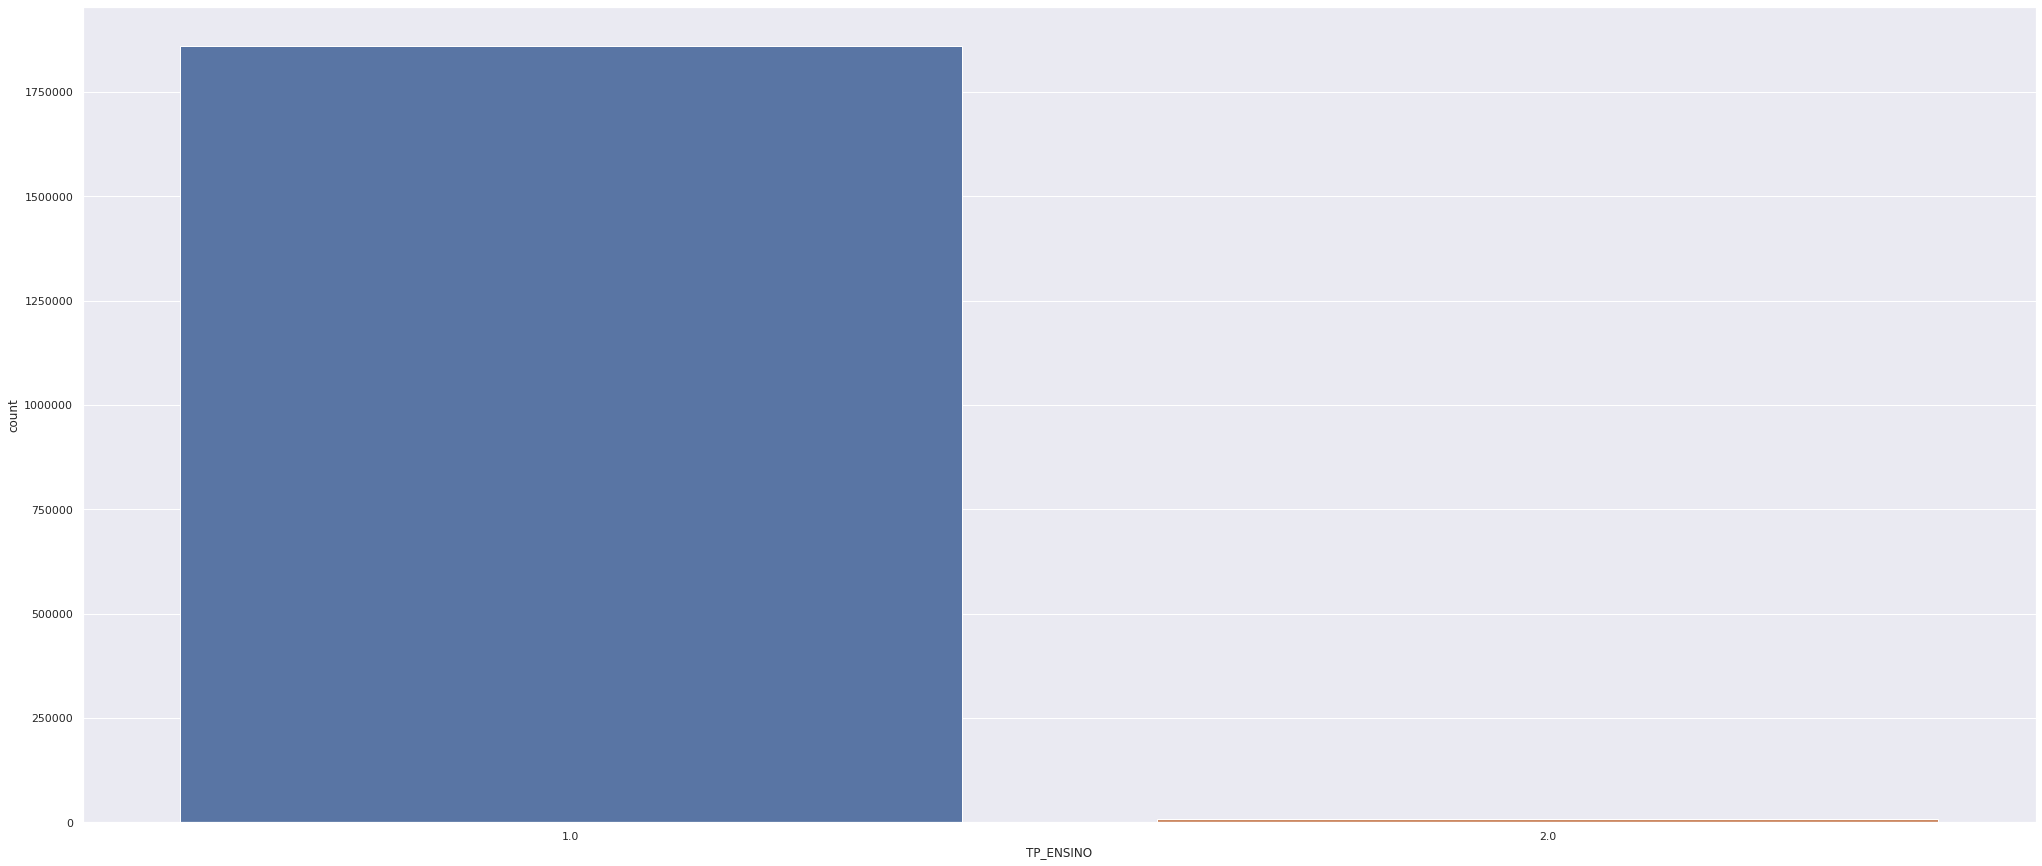

In [7]:
sns.countplot(df1['TP_ENSINO']);


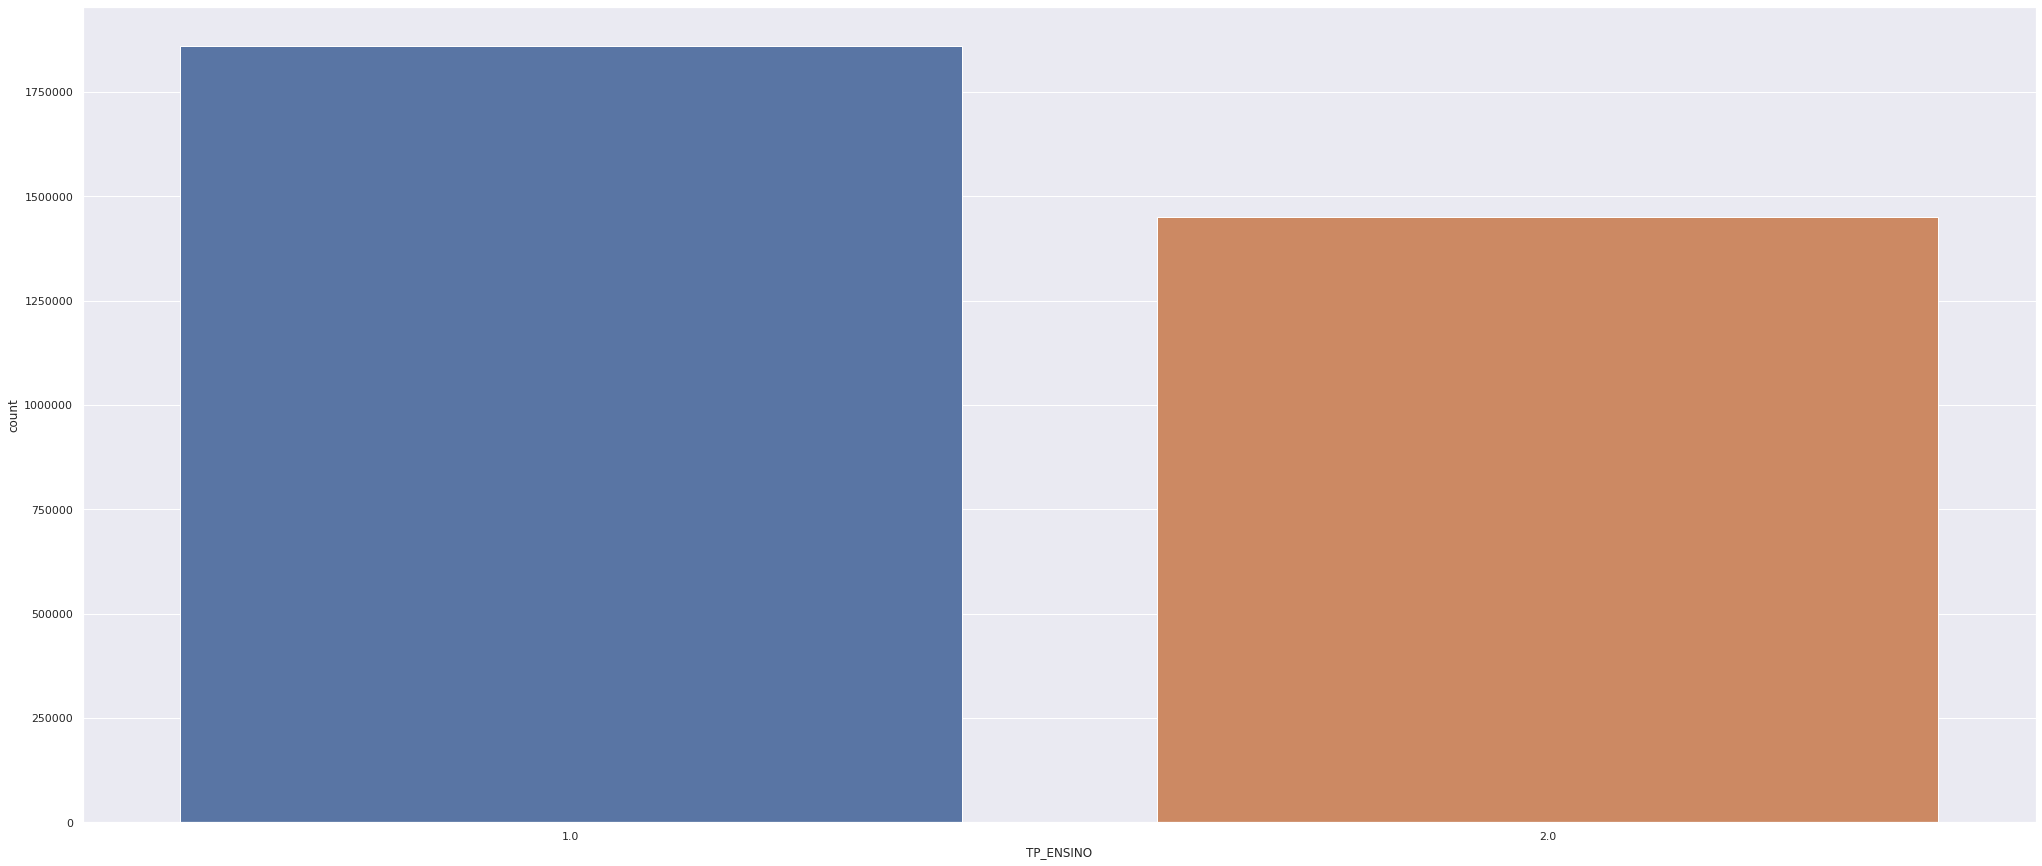

In [9]:
sns.countplot(df1['TP_ENSINO']);

In [38]:
dft = df1[['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','TP_STATUS_REDACAO','NU_NOTA_REDACAO',
           'TP_PRESENCA_CN','TP_PRESENCA_CH','TP_PRESENCA_LC','TP_PRESENCA_MT']]


In [39]:
dft.head(1000)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_STATUS_REDACAO,NU_NOTA_REDACAO,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT
0,426.500000,487.399994,530.900024,415.299988,1.0,680.0,1,1,1,1
1,463.000000,452.299988,456.600006,407.200012,1.0,520.0,1,1,1,1
2,381.700012,474.399994,530.599976,622.799988,1.0,600.0,1,1,1,1
3,426.700012,343.899994,444.200012,507.000000,1.0,660.0,1,1,1,1
4,623.700012,609.099976,637.099976,805.299988,1.0,840.0,1,1,1,1
5,481.500000,373.700012,420.000000,416.500000,1.0,300.0,1,1,1,1
6,427.100006,352.100006,497.700012,367.899994,1.0,440.0,1,1,1,1
7,515.599976,524.700012,566.799988,474.200012,1.0,440.0,1,1,1,1
8,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
9,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
